In [21]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import ParameterVector, Parameter

In [22]:
def FeatureMap(num_qubits=6, depth=1, degree=1, entanglement='partial', inverse=False):
    
    _num_qubits = num_qubits
    _degree = degree
    _depth = depth
    
    
    x = ParameterVector('x',_num_qubits) 
    #print([x for x in x])
    qr = QuantumRegister(size=_num_qubits, name='q', bits=None)

    qc = QuantumCircuit(qr)
    entangler_map = []
    
    if entanglement == 'partial':
        for i in range(0, _num_qubits - 1, 2):
            entangler_map.append([i, i + 1])
        for i in range(0, _num_qubits - 2, 2):
            entangler_map.append([i + 1, i + 2])
        
    for d in range(_depth):
        for i in range(_num_qubits):
            qc.h(qr[i])
            qc.rz(2*x[i], qr[i])
            qc.ry(x[i], qr[i])
            #if _degree:
                #qc.ry(x[i],qr[i])
        for src, targ in entangler_map:
            qc.cx(qr[src], qr[targ])
            #qc.ry(x[src], qr[targ])
            #qc.rz((((x[src] + x[targ])/2)), qr[targ])
            #qc.cx(qr[src], qr[targ])
            
    if inverse==True:
        qc = qc.inverse()
    
    return qc

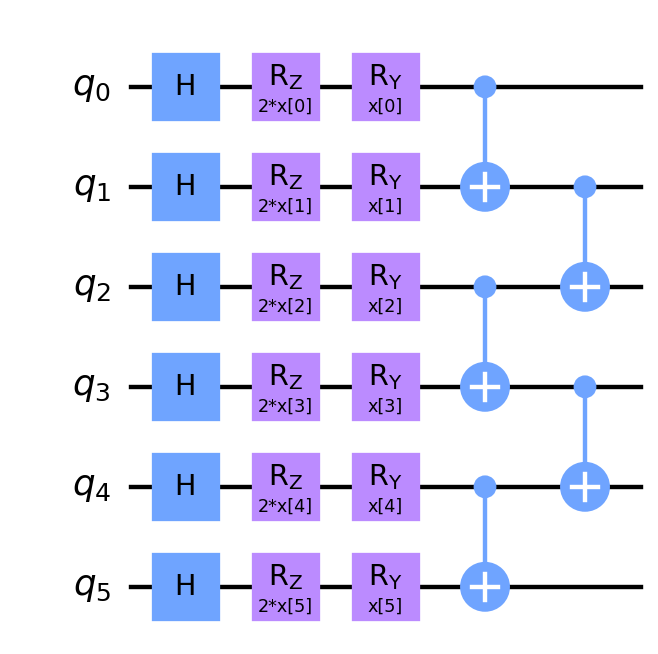

In [23]:
feature_map = FeatureMap(num_qubits=6, depth=1, degree=1, entanglement='partial', inverse=False)

feature_map.draw('mpl', scale=2.2, filename='images/feature.png')